# Support Vector Regression (SVR)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

## Importing the dataset

In [ ]:
dataset = pd.read_csv('WF_data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
y = y.reshape(len(y),1)

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

## Training the SVR model on the Training set

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
start_train = time.time()
regressor.fit(X_train, y_train)
end_train = time.time()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Predicting the Test set results

In [ ]:
start_pred = time.time()
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
end_pred = time.time()

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0.43 0.36]
 [0.43 0.41]
 [0.2  0.2 ]
 ...
 [0.77 0.78]
 [0.33 0.34]
 [0.1  0.12]]


##Plot

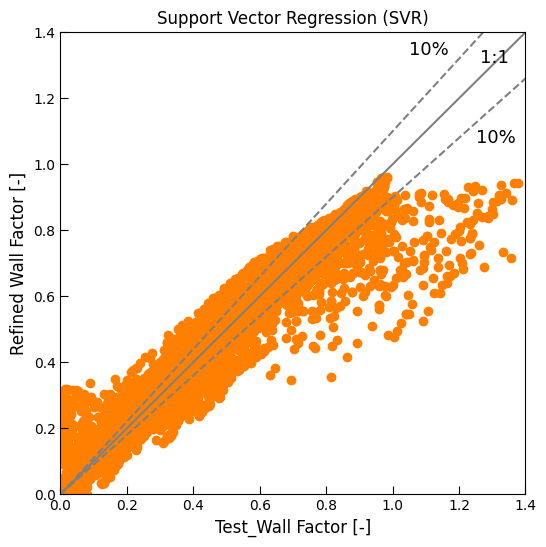

In [ ]:
import matplotlib.pyplot as plt


# Set the font to Helvetica (widely available)
plt.rcParams['font.family'] = 'Helvetica'

# Stronger Orange for 20% Deviation Lines
strong_orange = '#FF7F00'  # A brighter, stronger orange

plt.figure(figsize=(6, 6))
plt.plot([0., 1.4], [0., 1.4], 'grey')
plt.plot([0, 1.4], [0*1.1, 1.4*1.1], 'grey', linestyle='dashed')
plt.plot([0, 1.4], [0*0.9, 1.4*0.9], 'grey', linestyle='dashed')

# Annotating "20%" on the deviation lines
plt.text(1.17, 1.2 * 1.1, "10%", color='k', fontsize=13, ha='right', va='bottom')
plt.text(1.37, 1.23 * 0.9, "10%", color='k', fontsize=13, ha='right', va='top')
plt.text(1.35, 1.35, "1:1", color='k', fontsize=13, ha='right', va='top')

# **Set fixed axis limits**
plt.xlim(0, 1.4)  # Fix x-axis range from 0 to 1.5
plt.ylim(0, 1.4)  # Fix y-axis range from 0 to 1.5

# Create scatter plot
plt.scatter(y_test, y_pred, color=strong_orange, marker='o')

# Labels and title
plt.xlabel("Test_Wall Factor [-]", fontsize=12,)
plt.ylabel("Refined Wall Factor [-]", fontsize=12)
plt.title("Support Vector Regression (SVR)", fontsize=12)

plt.tick_params(axis='both', direction='in', length=6)
# Show plot

plt.show()

## ML models metrics

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

R-squared (R²): 0.9233639289715219
Root Mean Squared Error (RMSE): 0.06929135142700527
Mean Squared Error: 0.004801291382580745
Mean Absolute Error (MAE): 0.0372632209654621


In [ ]:
import time

# Measure training time
training_time = end_train - start_train

# Measure prediction time
prediction_time = end_pred - start_pred

print(f"Training Time: {training_time:.5f} seconds")
print(f"Prediction Time: {prediction_time:.5f} seconds")

Training Time: 51.36549 seconds
Prediction Time: 7.65572 seconds


## Vancouver Building WF

##Import Exp_data

In [ ]:
dataset = pd.read_csv('VB_EXP.csv')
X_VB = dataset.iloc[:, :-1].values
y_VB = dataset.iloc[:, -1].values

##WF_VB prediction

In [ ]:
start_pred_VB = time.time()
y_pred_VB = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_VB)).reshape(-1,1))
end_pred_VB = time.time()

##Plot _ VB

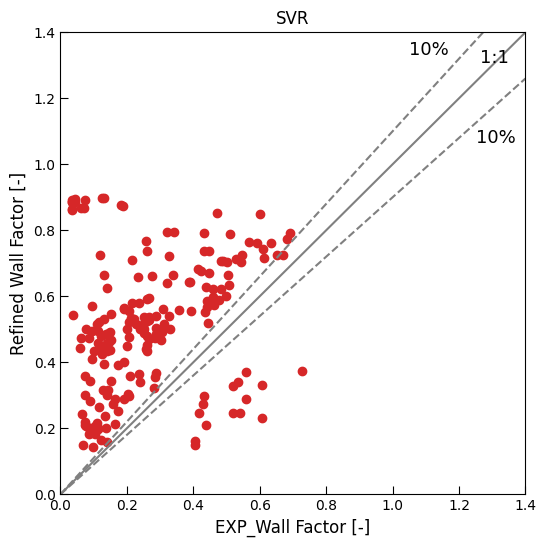

In [ ]:
import matplotlib.pyplot as plt

# Stronger Orange for 20% Deviation Lines
strong_orange = '#D62728'  # A brighter, stronger orange

plt.figure(figsize=(6, 6))
plt.plot([0., 1.4], [0., 1.4], 'grey')
plt.plot([0, 1.4], [0*1.1, 1.4*1.1], 'grey', linestyle='dashed')
plt.plot([0, 1.4], [0*0.9, 1.4*0.9], 'grey', linestyle='dashed')

# Annotating "20%" on the deviation lines
plt.text(1.17, 1.2 * 1.1, "10%", color='k', fontsize=13, ha='right', va='bottom')
plt.text(1.37, 1.23 * 0.9, "10%", color='k', fontsize=13, ha='right', va='top')
plt.text(1.35, 1.35, "1:1", color='k', fontsize=13, ha='right', va='top')

# **Set fixed axis limits**
plt.xlim(0, 1.4)  # Fix x-axis range from 0 to 1.5
plt.ylim(0, 1.4)  # Fix y-axis range from 0 to 1.5

# Create scatter plot
plt.scatter(y_VB, y_pred_VB, color=strong_orange, marker='o')

# Labels and title
plt.xlabel("EXP_Wall Factor [-]", fontsize=12,)
plt.ylabel("Refined Wall Factor [-]", fontsize=12)
plt.title("SVR", fontsize=12)

plt.tick_params(axis='both', direction='in', length=6)
# Show plot

plt.show()

##ML models metrics


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_VB, y_pred_VB)
print(f"R-squared (R²): {r2}")

rmse = np.sqrt(mean_squared_error(y_VB, y_pred_VB))
print(f"Root Mean Squared Error (RMSE): {rmse}")

mse = mean_squared_error(y_VB, y_pred_VB)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_VB, y_pred_VB)
print(f"Mean Absolute Error (MAE): {mae}")

average_pred_VB = sum(y_pred_VB) / len(y_pred_VB)
print(f"Average_pred_VB: {average_pred_VB}")

average_VB = sum(y_VB) / len(y_VB)
print(f"Average_VB: {average_VB}")

Ave_Error = float(((average_pred_VB - average_VB) * 100) / average_VB)
print(f"Ave_Error: {Ave_Error:.2f}%")


# Calculate individual percentage errors
individual_errors = (np.abs(y_pred_VB - y_VB) / y_VB) * 100
# Calculate the average error
average_error = np.mean(individual_errors)  # Use np.mean() to handle NumPy arrays
# Print the average error
print(f"Average Error: {average_error:.2f}%")

R-squared (R²): -2.770661865113945
Root Mean Squared Error (RMSE): 0.3329942233823001
Mean Squared Error: 0.11088515280598119
Mean Absolute Error (MAE): 0.2769941754726401
Average_pred_VB: [0.51]
Average_VB: 0.2686844826598983
Ave_Error: 89.47%
Average Error: 230.51%


<ipython-input-15-5fecb297bf3e>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ave_Error = float(((average_pred_VB - average_VB) * 100) / average_VB)


In [ ]:
import time


# Measure VB prediction time
prediction_time_VB = end_pred_VB - start_pred_VB

print(f"Prediction Time_VB: {prediction_time_VB:.5f} seconds")

Prediction Time_VB: 0.15160 seconds


## Vancouver Building WF _______ Overhang

##Import Exp_data

In [ ]:
dataset = pd.read_csv('VB_EXP_Overhang.csv')
X_VBO = dataset.iloc[:, :-1].values
y_VBO = dataset.iloc[:, -1].values

##WF_VB prediction

In [ ]:
start_pred_VBO = time.time()
y_pred_VBO = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_VBO)).reshape(-1,1))
end_pred_VBO = time.time()

##Plot _ VB

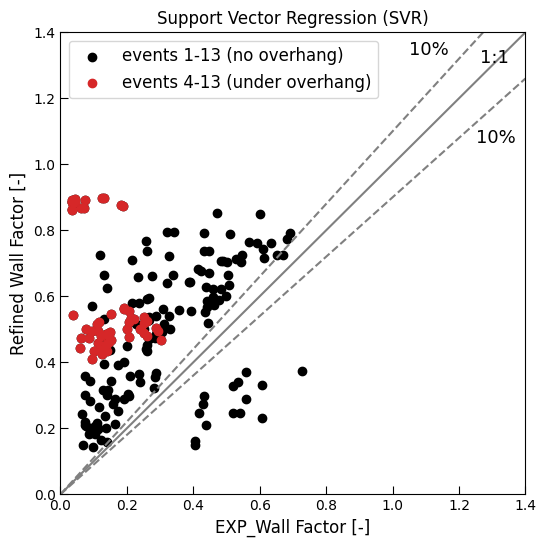

In [ ]:
import matplotlib.pyplot as plt

# Stronger Orange for 20% Deviation Lines
strong_orange = '#D62728'  # A brighter, stronger orange

plt.figure(figsize=(6, 6))
plt.plot([0., 1.4], [0., 1.4], 'grey')
plt.plot([0, 1.4], [0*1.1, 1.4*1.1], 'grey', linestyle='dashed')
plt.plot([0, 1.4], [0*0.9, 1.4*0.9], 'grey', linestyle='dashed')

# Annotating "20%" on the deviation lines
plt.text(1.17, 1.2 * 1.1, "10%", color='k', fontsize=13, ha='right', va='bottom')
plt.text(1.37, 1.23 * 0.9, "10%", color='k', fontsize=13, ha='right', va='top')
plt.text(1.35, 1.35, "1:1", color='k', fontsize=13, ha='right', va='top')

# **Set fixed axis limits**
plt.xlim(0, 1.4)  # Fix x-axis range from 0 to 1.5
plt.ylim(0, 1.4)  # Fix y-axis range from 0 to 1.5

# Create scatter plot
plt.scatter(y_VB, y_pred_VB, color='k', marker='o', label='events 1-13 (no overhang)')
# Create scatter plot
plt.scatter(y_VBO, y_pred_VBO, color=strong_orange, marker='o', label='events 4-13 (under overhang)')

# Labels and title
plt.xlabel("EXP_Wall Factor [-]", fontsize=12,)
plt.ylabel("Refined Wall Factor [-]", fontsize=12)
plt.title("Support Vector Regression (SVR)", fontsize=12)

plt.tick_params(axis='both', direction='in', length=6)
# Show plot

# Add legend
plt.legend(loc='upper left', fontsize=12)

plt.show()

##ML models metrics


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_VBO, y_pred_VBO)
print(f"R-squared (R²): {r2}")

rmse = np.sqrt(mean_squared_error(y_VBO, y_pred_VBO))
print(f"Root Mean Squared Error (RMSE): {rmse}")

mse = mean_squared_error(y_VBO, y_pred_VBO)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_VBO, y_pred_VBO)
print(f"Mean Absolute Error (MAE): {mae}")

average_pred_VBO = sum(y_pred_VBO) / len(y_pred_VBO)
print(f"Average_pred_VB: {average_pred_VBO}")

average_VBO = sum(y_VBO) / len(y_VBO)
print(f"Average_VB: {average_VBO}")

Ave_Error = float(((average_pred_VBO - average_VBO) * 100) / average_VBO)
print(f"Ave_Error: {Ave_Error:.2f}%")


# Calculate individual percentage errors
individual_errors = (np.abs(y_pred_VBO - y_VBO) / y_VBO) * 100
# Calculate the average error
average_error = np.mean(individual_errors)  # Use np.mean() to handle NumPy arrays
# Print the average error
print(f"Average Error: {average_error:.2f}%")

R-squared (R²): -41.063832781609186
Root Mean Squared Error (RMSE): 0.4945240064803658
Mean Squared Error: 0.24455399298539288
Mean Absolute Error (MAE): 0.4445341505134566
Average_pred_VB: [0.59]
Average_VB: 0.1450481109821429
Ave_Error: 306.47%
Average Error: 503.00%


<ipython-input-20-fec344088dc7>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ave_Error = float(((average_pred_VBO - average_VBO) * 100) / average_VBO)


In [ ]:
import time


# Measure VB prediction time
prediction_time_VB = end_pred_VB - start_pred_VB

print(f"Prediction Time_VB: {prediction_time_VB:.5f} seconds")

Prediction Time_VB: 0.15160 seconds


## VB Wall Factor (WF) Contour

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata


dataset_plot = pd.read_csv('VB_plot.csv')
X_VB_plot = dataset_plot.iloc[:, :].values
y = dataset_plot.iloc[:, 0] * dataset_plot.iloc[:, 5]
x = dataset_plot.iloc[:, 1] * dataset_plot.iloc[:, 6]


y_pred_VB_plot = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_VB_plot)).reshape(-1,1))
y_pred_VB_plot = y_pred_VB_plot.ravel()
print(x.shape, y.shape, y_pred_VB_plot.shape)

(10201,) (10201,) (10201,)


Interpolated values at (xx, yy):
[-0.03 -0.03 -0.02 -0.01 -0.    0.    0.01  0.02  0.02  0.03  0.03  0.04
  0.04  0.04  0.04  0.05  0.05  0.05  0.05  0.05  0.05  0.06  0.06  0.06
  0.06  0.06  0.06  0.06  0.06]


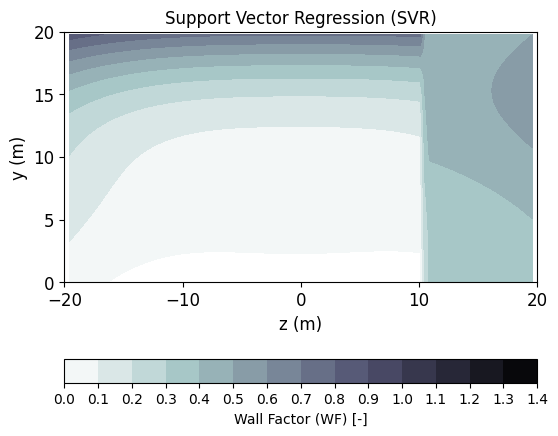

In [ ]:



# Create a grid of points for interpolation
X = np.linspace(min(x), max(x), 100)
Y = np.linspace(min(y), max(y), 100)
X, Y = np.meshgrid(X, Y)

# Perform interpolation
wf_interp = griddata((x, y), y_pred_VB_plot, (X, Y), method='linear')

# Plotting
plt.figure(figsize=(6.1, 5))
contour_levels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
contour = plt.contourf(X, Y, wf_interp, levels=contour_levels, cmap=plt.cm.bone_r)
plt.colorbar(contour, orientation='horizontal', ticks=contour_levels, label='Wall Factor (WF) [-]', pad=0.2)
plt.xticks(np.arange(-20, 20.0001, 10), fontsize=12)
plt.yticks(np.arange(0, 20.1, 5), fontsize=12)


# Scatter plot
xx = np.zeros(29)
yy = np.array([0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.25, 8.5, 8.75, 9, 9.2, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10])



wf_mid = griddata((x, y), y_pred_VB_plot, (xx, yy), method='linear')
# Print the interpolated values

# Labels and title
plt.xlabel("z (m)", fontsize=12,)
plt.ylabel("y (m)", fontsize=12)
plt.title("Support Vector Regression (SVR)", fontsize=12)

print("Interpolated values at (xx, yy):")
print(wf_mid)


plt.show()
